In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as spi
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
%matplotlib inline

In [2]:
def timeToRowNum(time):
    low, high = min(
        int(time*41), data0.shape[0]), min(int(time*47), data0.shape[0])
    mid = 0
    while low < high-1:
        mid = int((low+high)/2)
        # print(low,mid,high)
        if t0[mid] < time:
            low = mid
        else:
            high = mid
    temp = [low, mid, high]
    for ans in temp:
        if t0[ans] >= time:
            return ans

In [3]:
from scipy.fftpack import fft

# FFT


def get_fft_values(y_values, N, f_s):
    f_values = np.linspace(0.0, f_s/2.0, N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [4]:
file_path0 = '../../data/Final_Version/poor/590/ACCL/d37e6_2_sorted_part4_seg1.csv'
data0 = pd.read_csv(file_path0)
x0 = data0['x']
y0 = data0['y']
z0 = data0['z']
t0 = data0['time']
z0 = z0-np.mean(z0)

In [5]:
#253, 254
#40, 41
#251, 252
# 243,244
clock1, clock2 = 40, 41
rowNum1, rowNum2 = timeToRowNum(clock1), timeToRowNum(clock2)

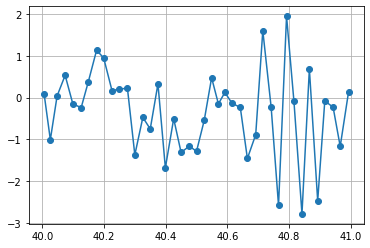

In [6]:
x_0 = list(t0[rowNum1:rowNum2])
y_0 = list(z0[rowNum1:rowNum2])
plt.plot(x_0, y_0, 'o-')
plt.grid(True)

In [7]:
st, ed = t0[0], t0[len(t0)-1]
x1 = np.linspace(st, ed, int((ed-st)*500))
x2 = np.linspace(st, ed, int((ed-st)*50))
x3 = np.linspace(st, ed, int((ed-st)*40))
spl = splrep(t0, z0)
y1 = splev(x1, spl)
y2 = splev(x2, spl)
y3 = splev(x3, spl)

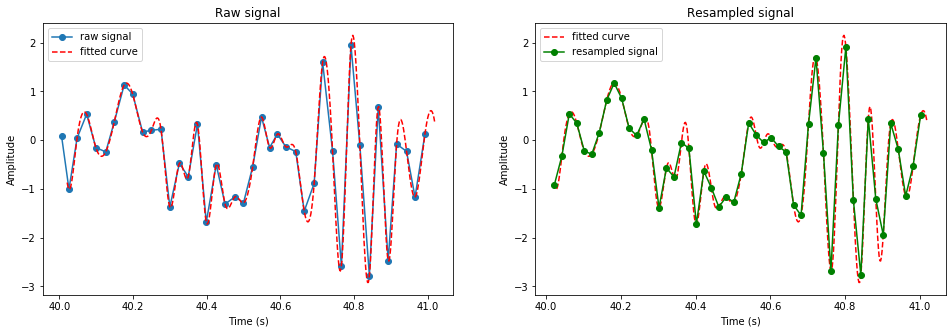

In [8]:
# 500Hz
x_1, y_1 = list(x1[clock1*500:clock2*500]), list(y1[clock1*500:clock2*500])
# 50Hz
x_2, y_2 = list(x2[clock1*50:clock2*50]), list(y2[clock1*50:clock2*50])
# 40Hz
x_3, y_3 = list(x3[clock1*40:clock2*40]), list(y3[clock1*40:clock2*40])

plt.figure(figsize=(25, 5))
# plot 1
plt.subplot(131)
plt.plot(x_0, y_0, 'o-', label='raw signal')
plt.plot(x_1, y_1, 'r--', label='fitted curve')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Raw signal')
plt.legend()

#plot 2
plt.subplot(132)
plt.plot(x_1, y_1, 'r--', label='fitted curve')
plt.plot(x_2, y_2, 'go-', label='resampled signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Resampled signal')
plt.legend()

'''
#plot 4
N1, f_s1 = 500, 500
N2, f_s2 = 50, 50
plt.subplot(133)
x_f1, y_f1 = get_fft_values(y_1, N1, f_s1)
x_f2, y_f2 = get_fft_values(y_2, N2, f_s2)
plt.plot(x_f1, y_f1, 'g-', label='500Hz')
plt.plot(x_f2, y_f2, 'r-', label='50Hz')
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of resampled signal')
plt.xlim(0,40)
plt.legend()
'''


plt.savefig('./resampling.svg', bbox_inches='tight', pad_inches=0)
#plt.plot(x_2, y_2, 'r.-')

In [9]:

#plot 3
#样本数，采样频率
'''
plt.figure(figsize=(25, 5))

N1, f_s1 = 50, 50
N2, f_s2 = 40, 40
plt.subplot(121)
x_f1, y_f1 = get_fft_values(y_2, N1, f_s1)
x_f2, y_f2 = get_fft_values(y_3, N2, f_s2)
plt.plot(x_f1, y_f1, 'r.-', label='50Hz')
plt.plot(x_f2, y_f2, '.-', label='40Hz')
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.title('FFT of resampled signal')
plt.legend()
'''




"\nplt.figure(figsize=(25, 5))\n\nN1, f_s1 = 50, 50\nN2, f_s2 = 40, 40\nplt.subplot(121)\nx_f1, y_f1 = get_fft_values(y_2, N1, f_s1)\nx_f2, y_f2 = get_fft_values(y_3, N2, f_s2)\nplt.plot(x_f1, y_f1, 'r.-', label='50Hz')\nplt.plot(x_f2, y_f2, '.-', label='40Hz')\nplt.xlabel('frequency(Hz)')\nplt.ylabel('amplitude')\nplt.title('FFT of resampled signal')\nplt.legend()\n"